In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv('Titanic-Dataset.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [20]:
df.sample 

<bound method NDFrame.sample of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

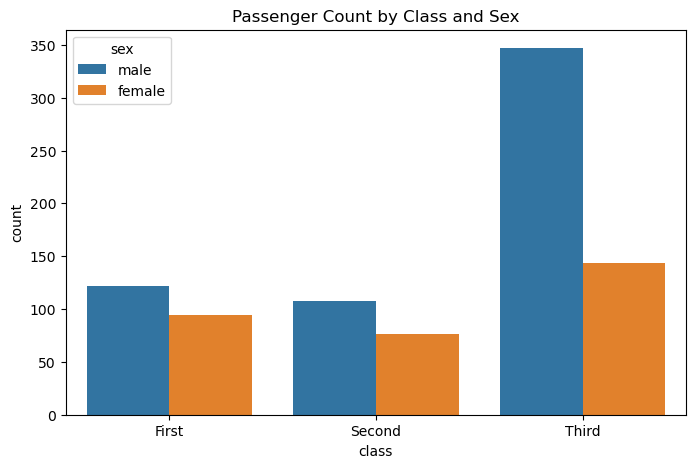

In [11]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# 1. Count plot of passengers by class and sex
plt.figure(figsize=(8,5))
sns.countplot(x="class", hue="sex", data=titanic)
plt.title("Passenger Count by Class and Sex")
plt.show()


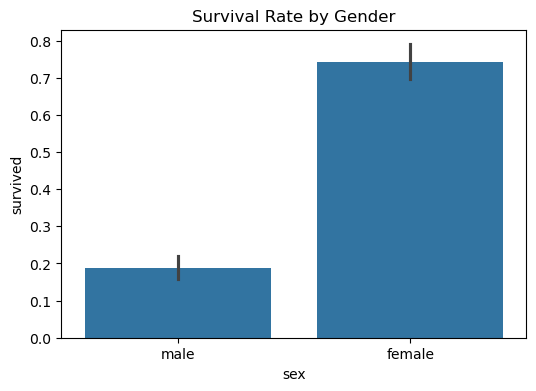

In [12]:
# 2. Survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender")
plt.show()

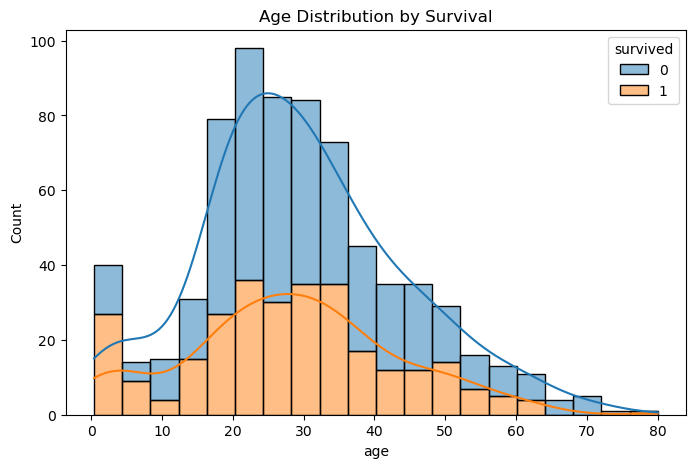

In [13]:
# 3. Age distribution by survival status
plt.figure(figsize=(8,5))
sns.histplot(data=titanic, x="age", hue="survived", kde=True, multiple="stack")
plt.title("Age Distribution by Survival")
plt.show()

In [14]:
import seaborn as sns
import re

In [15]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Example: Extract title (Mr, Mrs, Miss, Master, etc.)
def extract_title(name):
    match = re.search(r",\s*([^\.]+)\.", name)
    if match:
        return match.group(1).strip()
    return None


In [16]:
# Apply regex extraction
titanic["title"] = titanic["who"]  # fallback if no name column
if "name" in titanic.columns:   # some seaborn versions don't have 'name'
    titanic["title"] = titanic["name"].apply(extract_title)# Show unique titles


In [21]:
# Show unique titles
print("Unique titles extracted:")
print(titanic["title"].unique()[:10]) 

Unique titles extracted:
['man' 'woman' 'child']


In [17]:
# Count of each title
print("\nTitle counts:")
print(titanic["title"].value_counts().head())


Title counts:
title
man      537
woman    271
child     83
Name: count, dtype: int64


In [18]:
df = df.copy()
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [20]:
skew_value = df.skew(numeric_only = True)

In [21]:
skew_value

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [23]:
#imputation method

df = df.copy()
df['PassengerId'].fillna(df['PassengerId'].mean())
df['Pclass'].fillna(df['Pclass'].median())
df['Age'].fillna(df['Age'].median())
df['Survived'].fillna(df['Survived'].median())
df['Parch'].fillna(df['Parch'].median())
df['Fare'].fillna(df['Fare'].median())
df['SibSp'].fillna(df['SibSp'].median())
df['Name'].fillna(df['Name'].mode())
df['Sex'].fillna(df['Sex'].mode())
df['Cabin'].fillna(df['Cabin'].mode())
df['Embarked'].fillna(df['Embarked'].mode())
(df.isnull()).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df = df.copy()
df['PassengerId'].fillna(method = 'ffill')
df['Pclass'].fillna(method = 'bfill')

C:\Users\admin\AppData\Local\Temp\ipykernel_5316\2946786.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PassengerId'].fillna(method = 'ffill')
C:\Users\admin\AppData\Local\Temp\ipykernel_5316\2946786.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Pclass'].fillna(method = 'bfill')


0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [25]:
# interpolate method 
df['Sex'].interpolate(method = 'linear')

C:\Users\admin\AppData\Local\Temp\ipykernel_5316\2996339388.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['Sex'].interpolate(method = 'linear')


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object